<IPython.core.display.Javascript object>


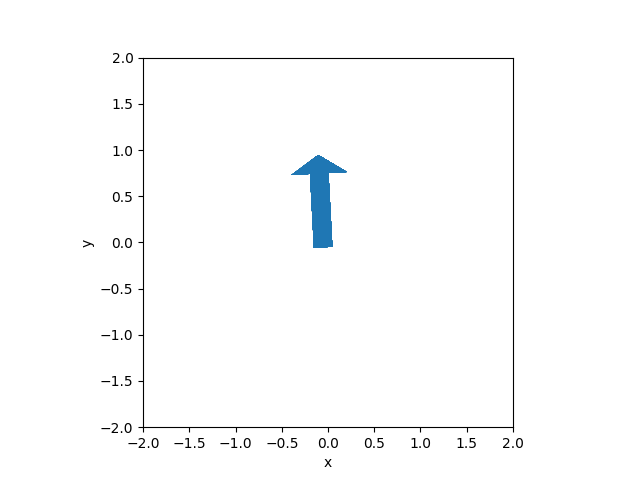

In [21]:
%matplotlib notebook

import numpy as np
import matplotlib.patches as patches
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib.transforms as mtransforms

# Create figure
fig, ax = plt.subplots()

# Axes labels and title are established
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_ylim(-2,2)
ax.set_xlim(-2,2)
ax.set_aspect('equal', adjustable='box')

N = 20
x = np.linspace(-1,1,N) 
y  = np.linspace(-1,1,N) 
dx = np.sin(x)
dy = np.cos(y)

patch = patches.Arrow(x[0], y[0], dx[0], dy[0])

def init():
    ax.add_patch(patch)
    return patch,

def animate(t):
    L = np.hypot(dx[t], dy[t])

    if L != 0:
        cx = float(dx[t]) / L
        sx = float(dy[t]) / L
    else:
        # Account for division by zero
        cx, sx = 0, 1

    trans1 = mtransforms.Affine2D().scale(L, 1)
    trans2 = mtransforms.Affine2D.from_values(cx, sx, -sx, cx, 0.0, 0.0)
    trans3 = mtransforms.Affine2D().translate(x[t], y[t])
    trans = trans1 + trans2 + trans3
    patch._patch_transform = trans.frozen( )
    return patch,

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               interval=20,
                               frames=N,
                               blit=True)

plt.show()

# Un semplice orologio

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

import numpy as np

%matplotlib notebook

deg = 3.14

x = np.cos( deg )
y = np.sin( deg )

fig, ax = plt.subplots( )
plt.xlim( -2, 2 )
plt.ylim( -2, 2 )

# plt.annotate( 'ciao', xy=(1,1), xytext=(0,0), arrowprops=dict(shrink=0.00) )
arrow = ax.arrow( 0, 0, x, y, width=0.05 )
ax.plot( [0, 0], [-2, 2], '--r' )
ax.plot( [-2, 2], [0, 0], '--r' )
ax.grid( True )

plt.show( )

<IPython.core.display.Javascript object>


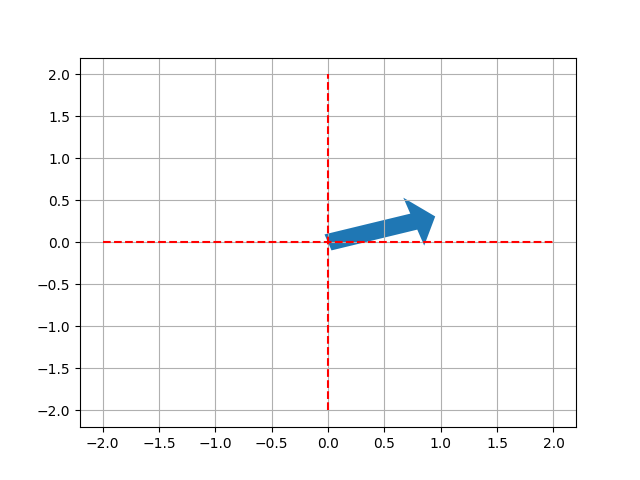

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import animation
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
import numpy as np

%matplotlib notebook

fig, ax = plt.subplots( )

rad = 0.0
rad_step = np.pi / 10
rad_interval = 125
x = []
y = []
dx = 1
dy = 0
ax.plot( x, y, 'b' )
ax.plot( [0, 0], [-2, 2], '--r' )
ax.plot( [-2, 2], [0, 0], '--r' )
ax.grid( True )

arrow = mpatches.Arrow( 0, 0, dx, dy )

def anim_init( ):
    ax.add_patch( arrow )
    return arrow,

def anim_update( i ):
    global rad, rad_step, arrow
    rad = rad + rad_step
    trot = mtransforms.Affine2D.from_values( np.cos( rad ), np.sin( rad ), -np.sin( rad ), np.cos( rad ), 0,  0 )
    arrow._patch_transform = trot.frozen( )
    return arrow,

anim = animation.FuncAnimation( fig, anim_update, init_func=anim_init, blit=True, interval=rad_interval )